In [1]:
%run ../modules.ipynb
# Change this cell to change the kernel function throughout

# import multiprocessing
# from multiprocessing import Pool
# from time import sleep

#tutorial
sys.path.append('../0. kernel-tutorials/')
# Local Utilities for Notebook
from utilities.kernels import linear_kernel, gaussian_kernel
from utilities.general import load_variables, get_stats
from utilities.plotting import (
    plot_base, 
    plot_projection,
    plot_regression,
    plot_simple,
    get_cmaps,
    table_from_dict,
    check_mirrors,
)
cmaps = get_cmaps()
plt.style.use("../0. kernel-tutorials/utilities/kernel_pcovr.mplstyle")
dbl_fig = (2 * plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1])


kernel_params = {"kernel": "rbf", "gamma": 1}
kernel_func = partial(rbf_kernel, gamma=1)
kernel_type = "gaussian"


In [6]:
"""The file has been created in zip format, reading it"""

frames_init_tot=ase.io.read('MP_complete_init.xyz', index=':')
frames_relax_tot=ase.io.read('MP_complete_relax.xyz', index=':')

zf = zipfile.ZipFile('./MP_complete.zip') 
df_csv = pd.read_csv(zf.open('MP_complete.csv'))
# hull_tot=df_csv['e_hull']
# gap_tot=df_csv['gap pbe']
# magn=df_csv['elastic anisotropy']
# elastic=df_csv['mu_b']
# bulk=df_csv['bulk modulus']
# shear=df_csv['shear modulus']
# formE_tot=df_csv['e_form']


natoms_list_tot=[]
for i in range(len(df_csv)):
    natoms_list_tot.append(natoms(df_csv['structure'][i]))

len(formE_tot), len(frames_init_tot), len(frames_relax_tot), len(natoms_list_tot)

(83989, 83989, 83989, 83989)

In [34]:
df_red=df_csv.drop(columns=['mpid', 'formula', 'structure', 'initial structure'])
df_red.head()

e_hull  gap pbe          mu_b  elastic anisotropy  bulk modulus  \
0  0.003319   0.0000  2.700000e-05            1.044699     33.154748   
1  0.039182   0.0000 -1.360000e-05          -11.326659     35.636106   
2  0.108143   0.0000  1.000000e-07            8.030000    124.000000   
3  0.071216   0.0000 -2.050000e-05            0.881277    101.242732   
4  3.509988   2.0113  3.000042e+00           10.884643      0.327165   

   shear modulus    e_form  
0       4.904836  0.003319  
1       1.830272  0.039182  
2      84.000000  0.108143  
3      44.836516  0.071216  
4      -0.064038  3.509988

In [8]:
general_metal=0
general_even=0
metal=0
even=0
number_structures_with_multiple_of_4=0
point_group_list=[]
yes_or_no=[]
for i in range(len(frames_init_tot)):
    number_electrons=sum(frames_init_tot[i].get_atomic_numbers())
    if number_electrons%2!=0:
        general_metal+=1
        if natoms_list_tot[i] %4==0:
            metal+=1
    if number_electrons%2==0:
        general_even+=1
        if natoms_list_tot[i] %4==0:
            even+=1
    if natoms_list_tot[i] %4==0:
        number_structures_with_multiple_of_4+=1
        yes_or_no. append(1)
    else:
        yes_or_no.append(0)

1
49
1
12
4
16
1
72
1
15
1
54
1
80
1
35
1
38
1
54
1
22
1
24
1
55
1
89
1
21
1
3
1
16
1
53
1
54
1
29
1
34
1
19
1
18
1
13
1
63
1
51
1
21
1
37
1
59
8
24
1
92
1
80
1
34
1
14
1
44
1
11
1
14
1
36
1
74
1
11
1
41
1
67
1
80
1
43
1
36
1
54
1
35
1
53
1
80
1
91
1
29
1
73
1
23
1
37
1
1
1
1
1
62
1
90
1
25
1
22
1
32
1
68
1
64
1
81
1
80
1
47
1
24
1
75
1
50
1
2
1
56
1
63
1
23
1
53
1
40
1
2
1
70
1
1
1
20
1
14
1
42
1
39
1
94
1
92
1
40
1
25
1
12
1
21
1
28
1
5
1
74
1
19
1
20
1
73
1
19
1
78
1
56
1
29
1
59
1
26
1
21
1
42
1
79
1
37
1
35
1
45
1
50
1
82
1
35
1
91
1
38
1
28
1
12
1
55
1
12
1
6
1
46
1
77
1
90
1
92
1
38
1
24
1
26
1
41
1
50
1
76
1
7
1
8
1
13
1
26
1
26
1
59
1
28
1
32
1
14
1
29
1
81
1
40
1
66
1
8
1
65
1
60
1
58
1
3
1
70
1
19
1
71
1
27
1
93
1
94
1
31
1
80
1
58
1
69
1
51
1
69
1
56
1
16
1
68
1
51
1
81
1
10
1
55
1
51
1
57
1
64
1
60
1
65
1
67
1
35
1
72
1
82
1
83
1
11
1
57
1
11
1
23
1
50
1
83
1
50
1
49
1
42
1
2
1
26
1
1
1
46
2
138
2
114
2
100
2
118
2
98
2
46
2
132
2
98
2
66
2
31
2
114
2
108
2
100
2
23
2
27
2

154
3
164
3
175
3
72
3
146
3
22
3
41
3
84
3
91
3
92
3
136
3
22
3
167
3
58
3
195
3
94
3
42
3
174
3
30
3
225
3
82
3
65
3
127
3
54
3
100
3
65
3
51
3
155
3
144
3
227
3
200
3
30
3
103
3
82
3
48
3
154
3
154
3
105
3
141
3
197
3
104
3
158
3
229
3
40
3
147
3
34
3
145
3
161
3
192
6
110
3
96
3
64
3
63
3
101
3
178
3
80
3
178
3
102
3
50
3
225
3
35
3
101
3
43
6
110
3
82
3
144
3
90
3
180
3
105
3
153
3
156
3
14
3
240
3
100
3
138
3
98
3
9
3
141
3
39
3
154
3
90
3
28
3
118
3
180
3
185
3
109
3
127
6
116
3
48
3
38
3
141
3
73
3
118
3
209
3
95
3
153
3
90
3
46
3
118
3
101
3
100
3
128
3
199
3
156
3
212
3
188
3
121
3
153
3
224
3
109
3
152
3
102
3
98
3
82
3
73
3
118
3
150
3
176
3
90
3
92
3
64
3
62
3
118
3
150
3
91
3
95
3
36
3
193
3
149
3
121
3
223
3
98
3
159
3
176
3
99
3
156
3
43
3
38
3
102
6
90
3
78
3
146
3
136
3
134
3
230
3
150
3
60
3
132
3
57
3
150
3
46
3
109
3
14
3
88
3
134
3
160
3
118
3
141
3
150
3
92
3
40
3
152
3
250
3
157
3
176
3
191
3
93
3
139
3
134
3
65
3
187
3
98
3
129
3
76
3
126
3
81
3
108
3
191
3
247

4
162
4
283
4
313
4
103
4
71
4
237
4
320
4
99
4
158
4
168
4
219
4
86
4
224
4
39
4
98
4
116
4
207
4
134
4
67
4
137
4
255
4
171
4
116
4
211
4
230
4
140
4
143
4
209
4
216
4
153
4
68
4
53
4
22
4
118
4
218
4
178
4
287
4
316
4
303
4
209
4
165
4
230
4
94
4
99
4
205
4
82
4
156
4
305
4
126
4
127
4
204
4
84
4
169
4
244
4
254
4
259
4
240
4
229
4
92
4
146
4
105
4
126
4
102
8
220
4
89
4
14
4
110
4
194
4
164
4
64
4
304
4
196
4
151
4
186
4
134
4
276
4
107
4
107
4
97
4
135
4
108
4
128
4
138
4
13
4
152
4
111
4
179
4
128
4
186
4
150
4
201
4
129
4
312
4
90
4
93
4
87
4
136
4
112
4
59
4
112
4
102
4
237
4
94
4
89
4
185
4
110
4
146
4
304
4
128
4
196
4
213
4
320
4
216
4
364
4
173
4
179
4
153
4
229
4
298
4
158
4
188
4
285
4
94
4
40
4
309
4
335
4
164
4
134
4
242
4
42
4
116
4
110
4
148
4
94
4
106
4
159
4
299
4
241
4
143
4
189
4
168
4
147
4
213
4
94
4
152
4
290
4
24
4
131
4
187
4
239
4
135
4
129
4
32
4
132
4
232
4
139
4
127
4
128
4
217
4
113
4
184
4
154
4
167
4
313
4
202
4
114
4
164
4
173
4
48
4
307
4
114
4
130
4

229
4
240
4
169
4
258
4
244
4
229
4
200
4
139
4
234
4
148
4
96
4
147
4
233
4
228
4
197
4
184
4
215
4
165
4
245
4
218
4
278
4
189
4
227
4
276
4
155
4
201
4
213
4
277
4
195
4
196
4
194
4
220
4
115
4
244
4
246
4
213
4
245
4
245
4
245
4
289
4
208
4
183
4
206
4
212
4
243
4
165
4
74
4
177
4
250
4
72
4
273
4
205
4
240
4
195
4
180
4
203
4
145
4
242
4
105
4
217
4
243
4
178
4
214
4
298
4
107
4
187
4
256
4
218
4
251
4
134
4
243
4
211
4
250
4
263
4
264
4
207
4
297
4
207
4
237
4
231
4
275
4
296
4
133
4
151
4
299
4
208
4
225
4
268
4
175
4
141
4
245
4
271
4
172
4
161
4
177
4
263
4
220
4
237
4
83
4
303
4
269
4
169
4
174
4
241
4
201
4
82
4
220
4
280
4
207
4
57
4
247
4
199
4
188
4
248
4
207
4
224
4
213
4
264
4
189
4
262
4
270
4
274
4
232
4
175
4
171
4
143
4
264
4
223
4
297
4
124
4
270
4
256
4
162
4
228
4
150
4
265
4
308
4
226
4
226
4
206
4
271
4
260
4
158
4
161
4
151
4
248
4
193
4
159
4
184
4
242
4
233
4
204
4
125
4
231
4
211
4
274
4
154
4
265
4
81
4
237
4
258
4
267
4
247
4
185
4
183
4
186
4
147
4
250
4

66
4
208
4
67
4
212
4
78
4
206
4
110
4
29
4
298
4
146
4
134
4
257
4
240
4
158
4
58
4
176
4
229
4
102
4
120
4
166
4
202
4
148
4
202
4
192
4
314
4
198
4
168
4
132
4
221
4
333
4
116
4
68
4
182
4
154
4
32
4
120
4
226
4
106
4
122
4
86
4
134
4
303
4
308
4
264
4
198
4
156
4
163
4
164
4
104
4
165
4
228
4
167
4
159
4
169
4
170
4
109
4
172
4
252
4
173
4
176
4
174
4
188
4
176
4
293
4
274
4
188
4
81
4
254
4
154
4
224
4
160
4
68
4
285
4
108
4
60
4
193
4
110
4
243
4
132
4
140
4
91
4
93
4
93
4
184
4
42
4
130
4
194
4
86
4
90
4
92
4
176
4
133
4
198
4
244
4
40
4
336
4
270
4
304
4
208
4
334
4
268
4
139
4
200
4
100
4
149
4
157
4
302
4
107
4
162
4
24
4
135
4
264
4
104
4
186
4
298
4
136
4
106
4
193
4
162
4
159
4
202
4
215
4
96
4
76
4
160
4
130
4
220
4
204
4
142
4
110
4
34
4
96
4
131
4
94
4
261
4
92
4
58
4
74
4
199
4
66
4
78
4
190
4
130
4
174
4
133
4
136
4
294
4
240
4
88
4
145
4
90
4
91
4
128
4
276
4
102
4
282
4
170
4
299
4
112
4
146
4
301
4
230
4
94
4
136
4
120
4
185
4
84
4
154
4
117
4
184
4
292
4
108
4
112

98
4
242
4
130
4
106
4
133
4
191
4
111
4
209
4
166
4
125
4
161
4
151
4
113
4
176
4
224
4
148
4
113
4
153
4
252
4
235
4
171
4
135
4
240
4
173
4
83
4
101
4
202
4
144
4
220
4
100
4
186
4
65
4
116
4
169
4
115
4
226
4
190
4
254
4
170
4
191
4
149
4
82
4
118
4
159
4
118
4
230
4
206
4
143
4
192
4
150
4
143
4
152
4
143
4
195
4
108
4
187
4
202
4
188
4
152
4
184
4
131
4
197
4
159
4
209
4
242
4
102
4
173
4
86
4
171
4
108
4
169
4
202
4
187
4
289
4
249
4
130
4
244
4
147
4
148
4
216
4
200
4
121
4
164
4
135
4
192
4
192
4
200
4
191
4
124
4
151
4
170
4
148
4
208
4
182
4
86
4
166
4
112
4
221
4
324
4
180
4
98
4
119
4
111
4
221
4
272
4
280
4
202
4
236
4
154
4
192
4
236
4
115
4
159
4
93
4
171
4
169
4
206
4
136
4
158
4
223
4
182
4
149
4
118
4
133
4
122
4
210
4
199
4
241
4
138
4
146
4
240
4
138
4
237
4
242
4
235
4
186
4
157
4
148
4
239
4
133
4
129
4
150
4
88
4
170
4
144
4
138
4
112
4
166
4
168
4
172
4
130
4
96
4
144
4
137
4
150
4
183
4
151
4
139
4
174
4
118
4
129
4
197
4
116
4
78
4
259
4
172
4
152
4
201
4
208

224
5
74
5
104
5
187
5
189
5
157
5
385
5
85
5
176
5
184
5
147
5
240
5
112
5
197
5
92
5
141
5
218
5
198
5
196
5
128
5
337
5
126
5
158
5
184
5
181
5
221
5
76
5
120
5
129
5
58
5
180
5
387
5
159
5
60
5
285
5
220
5
160
5
146
5
181
5
221
5
180
5
178
5
188
5
137
5
196
5
223
5
152
5
84
5
175
5
106
5
209
5
62
5
177
5
62
5
157
5
188
5
229
5
180
5
239
5
177
5
146
5
239
5
219
5
134
5
120
5
107
5
194
5
155
5
108
5
192
5
237
5
280
5
105
5
129
5
113
5
237
5
210
5
181
5
242
5
121
5
164
5
150
5
93
5
200
5
138
5
121
5
113
5
148
5
244
5
129
5
144
5
74
5
128
5
121
5
106
5
226
5
199
5
73
5
95
5
75
5
128
5
86
5
208
5
189
5
149
5
212
5
241
5
272
5
186
5
182
5
174
5
164
5
246
5
178
5
198
5
183
5
231
5
215
5
110
5
50
5
175
5
153
5
133
5
194
5
82
5
183
5
235
5
152
5
143
5
228
5
281
5
229
5
160
5
216
5
297
5
232
5
188
5
164
5
229
5
143
5
207
5
94
5
149
5
138
5
102
5
152
5
142
5
176
5
282
5
182
5
216
5
117
5
303
5
339
5
138
5
102
5
244
5
175
5
187
5
348
5
71
5
232
5
240
5
160
5
246
5
236
5
94
5
77
5
83
5
346
5
13

300
6
58
6
108
6
144
6
114
6
144
6
218
6
236
6
144
6
97
6
144
6
392
6
144
6
380
6
198
6
288
6
372
6
108
6
162
6
175
6
152
6
65
6
204
6
246
6
124
6
85
6
128
6
236
6
162
6
90
6
202
6
84
6
110
6
200
6
139
6
164
6
312
6
60
6
44
6
40
6
213
6
96
6
182
6
200
12
252
6
234
6
60
6
109
6
166
6
86
6
226
6
110
6
322
6
126
6
45
6
248
6
56
6
92
6
54
6
74
6
86
6
20
6
86
6
186
6
238
6
80
6
118
6
40
6
24
6
40
6
102
6
232
6
99
6
107
6
98
6
108
6
120
6
122
6
120
6
79
6
210
6
314
6
120
6
274
6
76
6
174
6
190
6
202
6
432
6
300
6
226
6
210
6
205
6
142
6
250
6
192
6
144
6
76
6
173
6
212
6
250
6
232
6
482
6
203
6
338
6
212
6
314
6
276
6
268
6
36
6
215
6
309
6
164
6
307
6
258
6
484
6
164
6
160
6
518
6
202
6
198
6
232
6
415
6
482
6
165
6
209
6
184
6
144
6
184
6
262
6
164
6
76
6
336
6
240
6
160
6
144
6
304
6
153
6
220
6
76
6
302
6
210
6
159
6
244
6
238
6
112
6
138
6
82
6
200
6
192
6
222
6
232
6
60
6
154
6
214
6
212
6
174
6
102
6
154
6
220
6
24
6
302
6
208
6
220
6
292
6
207
6
88
6
180
6
76
6
168
6
226
6
210
6
112


60
6
112
6
228
6
78
6
144
6
252
6
240
6
244
6
182
12
328
6
314
6
164
6
256
6
180
6
144
12
224
6
442
6
197
6
234
6
254
6
143
6
252
12
232
6
244
6
252
6
226
6
140
6
200
6
254
6
116
6
150
6
234
6
214
6
180
6
134
6
196
6
338
6
136
6
124
6
192
6
84
6
128
6
70
6
220
6
264
6
180
6
250
6
52
6
78
6
180
6
236
6
322
12
512
24
872
12
360
6
166
48
1872
6
312
6
252
6
328
18
906
12
328
6
132
6
220
6
36
6
252
6
214
6
124
6
422
12
296
6
244
6
128
18
432
6
132
6
106
18
774
6
258
6
300
6
234
18
312
6
86
6
220
6
190
18
906
12
570
6
252
6
246
18
240
6
128
12
208
6
180
12
360
6
156
6
380
12
570
12
160
6
256
6
160
12
176
6
264
6
112
6
100
6
292
6
252
6
264
6
204
12
160
6
264
6
64
12
652
6
308
6
216
6
240
7
68
7
222
7
114
7
214
7
242
7
70
7
104
7
86
7
170
7
216
7
156
7
160
7
224
7
154
7
294
7
240
7
145
7
184
7
150
7
180
7
226
7
190
7
186
7
122
7
206
7
314
7
248
7
228
7
91
7
81
7
198
7
298
7
146
7
130
7
320
7
196
7
226
7
190
7
92
7
122
7
172
7
154
7
91
7
87
7
154
7
57
7
354
7
226
7
168
7
244
7
334
7
116
7
89
7

106
8
142
8
364
8
122
8
152
8
149
8
105
8
149
8
155
8
125
8
127
8
210
8
143
8
141
8
142
8
292
8
173
8
149
8
130
8
150
8
149
8
121
8
173
8
152
8
173
8
157
8
110
8
104
8
200
8
171
8
156
8
113
8
184
8
572
8
105
8
123
8
184
8
113
8
132
8
157
8
140
8
141
8
171
8
150
8
173
8
102
8
123
8
141
8
114
8
146
8
140
8
182
8
150
8
147
8
121
8
147
8
123
8
156
8
111
8
183
8
119
8
163
8
122
8
103
8
106
8
150
8
138
8
122
8
174
8
150
8
106
8
141
8
142
8
131
8
296
8
105
8
100
8
132
8
137
8
124
8
137
8
124
8
174
8
172
8
148
8
148
8
132
8
142
8
111
8
149
8
101
8
131
8
151
8
145
8
145
8
133
8
137
8
114
8
117
8
152
8
151
8
183
8
151
8
136
8
144
8
109
8
117
8
98
8
100
8
119
8
133
8
119
8
152
8
169
8
136
8
106
8
109
8
126
8
167
8
126
8
143
8
167
8
106
8
133
8
328
8
113
8
143
8
98
8
132
8
144
8
146
8
180
8
146
8
178
8
560
8
116
8
178
8
128
8
128
8
146
8
100
8
152
8
96
8
177
8
163
8
133
8
178
8
150
8
131
8
97
8
179
8
148
8
133
8
101
8
127
8
159
8
152
8
141
8
105
8
136
8
136
8
133
8
196
8
159
8
160
8
179
8
153
8
11

290
8
316
8
402
8
358
8
260
8
306
8
498
8
114
8
588
8
210
8
166
8
276
8
262
8
612
8
512
8
318
8
570
8
620
8
314
8
654
8
318
8
618
8
648
8
206
8
274
8
366
8
508
8
156
8
314
8
264
8
294
8
590
8
410
8
504
8
312
8
378
8
460
8
504
8
428
8
594
8
616
8
324
8
262
8
298
8
296
8
202
8
408
8
310
8
542
8
374
8
208
8
414
8
472
8
548
8
314
8
592
8
382
8
202
8
364
8
652
8
604
8
466
8
420
8
272
8
156
8
232
8
400
8
97
8
144
8
250
8
184
8
220
8
194
8
606
8
121
8
158
8
271
8
128
8
302
8
372
8
112
8
180
8
82
8
133
8
184
8
290
8
132
8
198
8
98
8
248
8
82
8
208
8
98
8
184
8
106
8
120
8
404
8
88
8
204
8
148
64
1440
8
168
8
240
8
184
8
94
8
256
8
460
8
106
8
86
8
184
8
90
8
184
8
122
8
332
8
172
8
284
8
159
8
234
8
156
8
170
8
400
8
224
8
260
8
168
8
237
8
187
8
158
8
184
8
166
8
48
8
268
8
256
8
292
8
184
8
256
8
146
8
400
8
172
8
386
8
268
8
202
8
320
8
165
8
142
8
164
8
412
8
184
8
490
8
134
8
133
8
152
8
380
8
168
8
332
8
330
8
172
8
184
8
130
8
148
8
220
8
150
8
368
8
242
8
236
8
390
8
142
8
246
8
180
8


9
114
9
279
9
450
9
114
9
524
9
378
9
486
9
384
9
570
9
188
9
489
9
462
9
207
9
133
9
192
9
462
9
498
9
430
9
155
9
502
9
498
9
462
9
462
9
426
9
286
9
362
9
290
9
294
9
362
9
326
9
106
9
258
9
330
9
294
9
362
9
290
9
326
9
290
9
366
9
290
9
362
9
326
9
330
9
326
9
258
9
430
9
186
9
326
9
254
9
430
9
322
9
322
9
398
9
254
9
294
9
362
9
358
9
290
9
394
9
398
9
394
9
398
9
362
9
326
9
366
9
222
9
326
9
394
9
330
9
358
9
358
9
326
9
326
9
362
9
430
9
322
9
294
9
358
9
394
9
362
9
358
9
176
9
330
9
394
9
434
9
398
9
362
9
398
9
362
9
366
9
394
9
398
9
434
9
326
9
394
9
398
9
358
9
402
9
466
9
362
9
466
9
366
9
394
9
214
9
319
9
210
9
322
9
358
9
430
9
430
9
146
9
430
9
394
9
430
9
390
9
286
9
402
9
466
9
502
9
398
9
434
9
434
9
322
9
398
9
358
9
398
9
394
9
470
9
358
9
426
9
470
9
434
9
390
9
466
9
358
9
390
9
462
9
390
9
466
9
354
9
117
9
430
9
426
9
354
9
438
9
394
9
430
9
426
9
534
9
318
9
230
9
585
9
294
9
555
9
218
9
339
9
192
9
158
9
186
9
160
9
192
9
360
9
210
9
142
9
591
9
139
9
19

516
10
416
10
229
10
211
10
208
10
100
10
270
10
450
10
185
10
62
10
152
10
308
10
514
10
496
10
338
10
229
10
152
10
290
10
228
10
466
10
265
10
472
10
266
10
328
10
304
10
232
10
237
10
268
10
136
10
628
10
380
10
416
10
608
10
209
10
470
10
262
10
283
10
452
10
408
10
203
10
308
10
225
10
101
10
88
10
60
10
156
10
344
10
316
10
268
10
380
10
136
10
344
10
272
10
234
10
386
10
464
10
172
10
208
10
124
10
276
10
140
10
516
10
478
10
161
10
328
10
286
10
426
10
358
10
170
10
266
10
554
10
189
10
332
10
454
10
484
10
157
10
262
10
324
10
380
10
268
10
263
10
228
10
406
10
288
10
562
10
228
10
410
10
432
10
328
10
230
10
324
10
318
10
144
10
662
10
244
10
108
10
118
10
554
10
220
10
306
10
225
10
188
10
284
10
452
10
100
10
294
10
342
10
300
10
142
10
140
10
338
10
550
10
216
10
118
10
136
10
164
10
165
10
229
10
258
10
216
10
285
10
360
10
185
10
291
10
296
10
372
10
550
10
118
10
276
10
288
10
186
10
111
10
382
10
152
10
390
10
584
10
175
10
492
10
138
10
248
10
265
10
486
10
624
10
12

236
11
80
11
120
11
647
11
154
11
423
11
236
11
137
11
128
11
198
11
85
11
244
11
219
11
517
11
182
11
114
11
640
11
142
11
284
11
609
11
79
11
188
11
201
11
252
11
133
11
90
11
304
11
287
11
138
11
132
11
123
11
92
11
110
11
129
11
138
11
273
11
459
11
156
11
376
11
125
11
448
11
385
11
589
11
224
11
546
11
526
11
138
11
113
11
340
11
234
11
350
11
271
11
232
11
301
11
190
11
382
11
323
11
363
11
154
11
180
11
146
11
366
11
146
11
374
11
362
11
261
11
339
11
152
11
325
11
184
11
115
11
451
11
523
11
562
11
188
11
352
11
275
11
411
11
239
11
240
11
415
11
204
11
152
11
138
11
720
11
427
11
118
11
691
11
404
11
131
11
226
11
126
11
125
11
206
11
202
11
180
11
141
11
300
11
147
11
230
11
140
11
485
11
226
11
242
11
117
11
136
11
474
11
333
11
289
11
371
11
136
11
291
11
395
11
557
11
188
11
511
11
149
11
312
11
270
11
262
11
338
11
142
11
138
11
417
11
357
11
359
11
256
11
522
11
140
11
520
11
152
11
186
11
425
11
129
11
176
11
178
11
172
11
496
11
136
11
198
11
94
11
254
11
264
11
262
1

166
12
508
12
544
12
512
12
432
12
468
12
508
12
608
12
258
12
72
12
472
12
178
12
500
12
468
12
472
12
576
12
432
12
612
12
540
12
540
12
258
12
540
12
504
12
576
12
580
12
504
12
24
12
540
12
576
12
576
12
540
12
504
12
612
12
580
12
572
12
608
12
544
12
616
12
508
12
536
12
312
12
396
12
608
12
310
12
396
12
572
12
608
12
360
12
680
12
644
12
648
12
644
12
572
12
608
12
316
12
400
12
278
12
80
12
576
12
536
12
504
12
500
12
540
12
504
12
540
12
540
12
468
12
608
12
208
12
576
12
312
12
648
12
558
12
644
12
612
12
536
12
504
12
216
12
40
12
464
12
392
12
576
12
540
12
612
12
536
12
428
12
572
12
428
12
572
12
500
12
536
12
540
12
536
12
608
12
432
12
504
12
536
12
544
12
540
12
468
12
540
12
504
12
540
12
536
12
572
12
576
12
580
12
500
12
540
12
500
12
536
12
500
12
464
12
504
12
504
12
500
12
432
12
472
12
576
12
472
12
576
12
436
12
608
12
440
12
536
12
432
12
476
12
464
12
400
12
544
12
612
12
572
12
508
12
234
12
436
12
502
12
572
12
504
12
464
12
432
12
396
12
576
12
468
12
472

200
12
236
12
256
12
426
12
460
12
328
12
324
12
324
12
324
12
612
12
728
12
224
12
184
12
448
12
208
12
693
12
278
12
278
12
260
12
456
12
468
12
304
12
516
12
224
12
304
12
442
12
320
12
292
12
440
12
276
12
256
12
584
12
162
12
136
12
552
12
244
12
350
12
636
12
464
12
392
12
420
12
720
12
352
12
596
12
428
12
272
12
520
12
384
12
136
12
888
12
70
12
278
12
628
12
376
12
270
12
464
12
464
12
396
12
552
12
810
12
147
12
440
12
528
12
644
12
532
12
220
12
648
12
464
12
560
12
452
12
400
12
660
12
620
12
423
12
896
12
346
12
128
12
244
12
460
12
270
12
224
12
700
12
552
12
236
12
564
12
208
12
168
12
72
12
260
12
382
12
332
12
212
12
632
12
24
12
134
12
392
12
364
12
532
12
712
12
209
12
504
12
460
12
456
12
152
12
548
12
462
12
432
12
438
12
448
12
152
12
132
12
340
12
472
12
480
12
242
12
568
12
628
12
328
12
544
12
376
12
366
12
244
12
640
12
288
12
700
12
300
12
76
12
170
12
664
12
280
12
612
12
576
12
142
12
764
12
480
12
504
12
224
12
453
12
404
12
616
12
424
12
472
12
288
12
696

614
14
598
14
396
14
472
14
758
14
104
14
140
14
434
14
608
14
488
14
380
14
396
14
447
14
284
14
472
14
505
14
124
14
230
14
448
14
348
14
352
14
424
14
624
14
224
14
264
14
778
14
540
14
604
14
384
14
340
14
228
14
662
14
86
14
177
14
394
14
494
14
360
14
74
14
146
14
516
14
140
14
380
14
432
14
496
14
298
14
408
14
870
14
782
14
284
14
472
14
201
14
280
14
624
14
374
14
272
14
626
14
684
14
242
14
182
14
186
14
188
14
416
14
132
14
646
14
392
14
384
14
208
14
476
14
492
14
184
14
601
14
222
14
836
14
264
14
792
14
424
14
452
14
204
14
638
14
244
14
350
14
654
14
276
14
452
14
420
14
520
14
610
14
619
14
308
14
292
14
596
14
216
14
416
14
580
14
358
14
608
14
220
14
212
14
292
14
264
14
696
14
460
14
740
14
364
14
192
14
664
14
488
14
444
14
484
14
460
14
696
14
484
14
332
14
464
14
808
14
120
14
475
14
508
14
324
14
474
14
460
14
429
14
418
14
164
14
692
14
902
14
172
14
528
14
764
14
260
14
140
14
612
14
446
14
638
14
80
14
113
14
584
14
485
14
244
14
437
14
180
14
262
14
380
14
30

440
15
455
15
176
15
163
15
154
15
581
15
164
15
179
15
136
15
320
15
438
15
167
15
136
15
142
15
178
15
620
15
150
15
152
15
581
15
186
15
218
15
171
15
358
15
142
15
144
15
330
15
174
15
168
15
359
15
138
15
450
15
418
15
245
15
167
15
582
15
130
15
130
15
150
15
172
15
456
15
126
15
460
15
381
15
427
15
436
15
418
15
450
15
372
15
435
15
166
15
444
15
720
15
277
15
266
15
176
15
642
15
436
15
186
15
306
15
100
15
498
15
168
15
181
15
96
15
183
15
78
15
142
15
144
15
175
15
525
15
155
15
99
15
525
15
168
15
518
15
552
15
348
15
544
15
99
15
162
15
335
15
135
15
211
15
289
15
123
15
186
15
145
15
182
15
142
15
183
15
175
15
720
15
162
15
570
15
129
15
101
15
183
15
95
15
155
15
77
15
168
15
218
15
280
15
122
15
191
15
113
15
127
15
127
15
169
15
178
15
230
15
98
15
157
15
177
15
179
15
393
15
790
15
288
15
153
15
150
15
192
15
498
15
138
15
206
15
177
15
129
15
177
15
171
15
142
15
143
15
164
15
119
15
161
15
169
15
100
15
123
15
179
15
150
15
202
15
171
15
173
15
145
15
177
15
165
15

325
16
199
16
223
16
219
16
232
16
215
16
224
16
299
16
219
16
219
16
256
16
223
16
250
16
267
16
233
16
240
16
271
16
256
16
282
16
236
16
249
16
210
16
246
16
196
16
206
16
200
16
219
16
234
16
231
16
312
16
262
16
232
16
238
16
236
16
216
16
267
16
218
16
251
16
222
16
278
16
234
16
247
16
256
16
250
16
235
16
217
16
198
16
164
16
196
16
223
16
210
16
216
16
212
16
268
16
302
16
213
16
249
16
233
16
221
16
246
16
168
16
203
16
230
16
216
16
232
16
172
16
922
16
858
16
336
16
184
16
1052
16
816
16
200
16
250
16
251
16
233
16
226
16
219
16
201
16
236
16
249
16
237
16
243
16
269
16
213
16
428
16
216
16
194
16
249
16
212
16
480
16
209
16
300
16
944
16
196
16
211
16
640
16
316
16
388
16
199
16
201
16
112
16
176
16
218
16
212
16
195
16
187
16
116
16
1044
16
592
16
128
16
169
16
236
16
184
16
204
16
638
16
648
16
348
16
564
16
340
16
424
16
316
16
197
16
124
16
432
16
212
16
200
16
255
16
388
16
190
16
164
16
206
16
316
16
156
16
244
16
280
16
404
16
332
16
244
16
280
16
172
16
512
16
228


220
16
190
16
214
16
696
16
220
16
248
16
168
16
170
16
204
16
294
16
169
16
1060
16
816
16
960
16
584
16
165
16
692
16
178
16
504
16
980
16
154
16
700
16
221
16
592
16
191
16
186
16
453
16
178
16
264
16
230
16
235
16
308
16
217
16
160
16
152
16
197
16
185
16
218
16
242
16
224
16
219
16
193
16
304
16
194
16
200
16
304
16
184
16
224
16
205
16
193
16
211
16
512
16
204
16
249
16
222
16
230
16
221
16
230
16
222
16
196
16
191
16
193
16
199
16
186
16
242
16
256
16
222
16
274
16
204
16
274
16
263
16
183
16
257
16
254
16
204
16
388
16
208
16
216
16
228
16
200
16
304
16
181
16
400
16
292
16
652
16
668
16
466
16
758
16
398
16
528
16
408
16
892
16
484
16
472
16
1064
16
956
16
360
16
544
16
278
16
199
16
494
16
112
16
208
16
814
16
616
16
624
16
620
16
636
16
488
16
340
16
646
16
872
16
616
16
348
16
688
16
794
16
480
16
394
16
199
16
624
16
608
16
404
16
672
16
478
16
538
16
474
16
198
16
512
16
280
16
180
16
170
16
424
16
636
16
640
16
484
16
884
16
268
16
538
16
232
16
189
16
488
16
514
16
480


253
18
138
18
250
18
256
18
253
18
263
18
256
18
398
18
952
18
238
18
257
18
266
18
936
18
265
18
256
18
220
18
768
18
275
18
188
18
253
18
263
18
280
18
384
18
796
18
236
18
434
18
247
18
256
18
254
18
254
18
198
18
266
18
254
18
250
18
188
18
266
18
284
18
253
18
1064
18
924
18
264
18
566
18
996
18
940
18
708
18
170
18
436
18
744
18
444
18
228
18
300
18
1214
18
180
18
491
18
490
18
786
18
402
18
888
18
144
18
348
18
1000
18
938
18
1086
18
620
18
650
18
978
18
239
18
140
18
436
18
170
18
1218
18
228
18
180
18
716
18
616
18
362
18
180
18
192
18
260
18
464
18
600
18
478
18
392
18
368
18
406
18
736
18
376
18
798
18
1180
18
180
18
636
18
100
18
180
18
460
18
890
18
318
18
656
18
596
18
980
18
315
18
786
18
296
18
450
18
548
18
438
18
764
18
256
18
884
18
100
18
320
18
348
18
684
18
138
18
414
18
148
18
560
18
230
18
170
18
270
18
239
18
246
18
180
18
408
18
306
18
292
18
396
18
672
18
212
18
342
18
708
18
518
18
374
18
888
18
260
18
216
18
340
18
1176
18
463
18
282
18
1196
18
456
18
500
1

266
20
472
20
236
20
514
20
204
20
708
20
258
20
800
20
104
20
324
20
472
20
472
20
396
20
220
20
308
20
452
20
232
20
146
20
316
20
176
20
472
20
220
20
258
20
664
20
400
20
1075
20
272
20
436
20
232
20
336
20
222
20
168
20
532
20
664
20
726
20
354
20
524
20
776
20
216
20
144
20
160
20
432
20
552
20
340
20
232
20
212
20
592
20
256
20
232
20
237
20
324
20
224
20
274
20
316
20
178
20
312
20
212
20
578
20
176
20
360
20
172
20
309
20
254
20
184
20
352
20
220
20
372
20
176
20
232
20
182
20
218
20
232
20
112
20
348
20
234
20
220
20
150
20
232
20
344
20
664
20
214
20
200
20
290
20
144
20
293
20
624
20
290
20
480
20
540
20
636
20
558
20
504
20
178
20
289
20
146
20
320
20
176
20
229
20
226
20
236
20
520
20
396
20
486
20
240
20
204
20
231
20
212
20
220
20
148
20
696
20
335
20
367
20
396
20
448
20
460
20
502
20
232
20
216
20
252
20
236
20
120
20
88
20
952
20
352
20
1628
20
476
20
760
20
650
20
216
20
172
20
464
20
648
20
436
20
360
20
468
20
128
20
404
20
404
20
504
20
1072
20
376
20
314
20
340


352
20
318
20
380
20
552
20
512
20
594
20
421
20
208
20
936
20
392
20
328
20
224
20
272
20
380
20
328
20
256
20
468
20
824
20
452
20
448
20
552
20
544
20
264
20
616
20
592
20
400
20
416
20
534
20
556
20
760
20
1105
20
340
20
952
20
256
20
632
20
322
20
360
20
398
20
331
20
303
20
1040
20
1040
20
420
20
218
20
528
20
736
20
348
20
264
20
384
20
294
20
294
20
334
20
624
20
900
20
340
20
340
20
488
20
900
20
350
20
220
20
236
20
282
20
330
20
532
20
252
20
275
20
174
20
306
20
200
20
288
20
270
20
660
20
1060
20
1140
20
688
20
248
20
860
20
296
20
276
20
88
20
912
20
1080
20
424
20
544
20
220
20
420
20
350
20
342
40
512
20
220
20
372
20
248
20
432
20
436
20
284
40
700
20
322
20
532
20
380
20
380
20
532
20
246
20
344
20
210
20
440
20
486
20
428
20
356
20
260
40
1056
20
320
20
330
20
432
20
378
20
342
20
242
20
312
20
478
20
224
20
488
20
224
20
244
20
700
20
222
20
218
20
332
20
450
20
444
20
218
20
380
20
460
20
424
20
224
20
752
20
218
20
264
20
308
20
1512
20
232
20
530
20
648
20
454
20

292
22
292
22
292
22
292
22
292
22
284
22
284
22
284
22
284
22
284
22
284
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
292
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
280
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
288
22
100
22
908
22
540
22
676
22
268
22
634
22
376
22
696
22
328
22
672
22
1300
22
392
22
340
22
140
22
556
22
820
22
644
22
476
22
620
22
228
22
568
22
508
22
700
22
584
22
556
22
396
22
508
22
484
22
748
22
596
22
916
2

1224
24
576
24
416
24
684
24
576
24
492
24
208
24
500
24
520
24
524
24
428
24
384
24
250
24
408
24
416
24
1356
24
304
24
400
24
616
24
420
24
416
24
272
24
612
24
468
24
468
24
624
24
796
24
438
24
636
24
288
24
560
24
208
24
168
24
588
24
492
24
280
24
608
24
556
24
432
24
824
24
296
24
292
24
982
24
288
24
688
24
234
24
376
24
964
24
1688
24
240
24
700
24
256
24
376
24
1316
24
300
24
1396
24
238
24
760
24
576
24
964
24
670
24
700
24
686
24
292
24
240
24
392
24
552
24
988
24
240
24
316
24
376
24
243
24
276
24
264
24
260
24
340
24
260
24
240
24
348
24
330
24
291
24
246
24
338
24
257
24
352
24
290
24
272
24
848
24
236
24
356
24
288
24
340
24
248
24
323
24
322
24
328
24
260
24
278
24
236
24
330
24
264
24
522
24
236
24
260
24
968
24
341
24
240
24
242
24
264
24
520
24
396
24
288
24
420
24
304
24
260
24
289
24
294
24
332
24
308
24
312
24
218
24
218
24
344
24
316
24
438
24
336
24
338
24
230
24
252
24
524
24
346
24
572
24
326
24
304
24
244
24
228
24
338
24
331
24
240
24
384
24
260
24
472
24
3

520
25
159
25
154
25
452
25
666
25
650
25
664
25
665
25
666
25
261
25
239
25
580
25
515
25
669
50
616
25
396
25
559
25
579
25
328
25
318
25
491
26
638
26
452
26
334
26
470
26
286
26
652
26
364
26
422
26
1380
26
377
26
456
26
460
26
484
26
408
26
420
26
288
26
328
26
306
26
629
26
462
26
253
26
180
26
718
26
212
26
260
26
280
26
161
26
290
26
448
26
188
26
232
26
404
26
348
26
182
26
543
26
186
26
804
26
308
26
332
26
306
26
1202
26
488
26
326
26
368
26
264
26
580
26
312
26
280
26
320
26
294
26
364
26
244
26
298
26
255
26
262
26
354
26
568
26
332
26
496
26
266
26
270
26
270
26
864
26
256
26
562
26
332
26
590
26
340
26
220
26
347
26
228
26
218
26
272
26
224
26
266
26
226
26
268
26
310
26
268
26
280
26
416
26
264
26
302
26
274
26
264
26
234
26
214
26
312
26
260
26
239
26
220
26
222
26
270
26
308
26
222
26
262
26
250
26
276
26
308
26
306
26
140
26
272
26
180
26
260
26
280
26
562
26
278
26
152
26
276
26
632
26
204
26
332
26
252
26
248
26
272
26
272
26
238
26
246
26
820
26
248
26
898
26
332


254
28
880
28
377
28
289
28
424
28
399
28
290
28
420
28
352
28
192
28
392
28
360
28
284
28
532
28
252
28
422
28
426
28
248
28
292
28
280
28
872
28
186
28
409
28
482
28
872
28
284
28
395
28
474
28
399
28
340
28
404
28
375
28
328
28
532
28
387
28
300
28
305
28
300
28
348
28
256
28
376
28
423
28
312
28
536
28
302
28
312
28
312
28
329
28
421
28
340
28
312
28
296
28
329
28
312
28
1336
28
728
28
312
28
339
28
268
28
420
28
334
28
304
28
328
28
336
28
310
28
299
28
340
28
312
28
248
28
244
28
254
28
412
28
792
28
403
28
438
28
808
28
394
28
381
28
816
28
1512
28
276
28
296
28
429
28
458
28
344
28
736
28
792
28
432
28
316
28
188
28
528
28
520
28
343
28
434
28
944
28
284
28
328
28
920
28
363
28
352
28
424
28
309
28
403
28
308
28
298
28
488
28
284
28
379
28
375
28
254
28
400
28
390
28
426
28
428
28
376
28
1016
28
704
28
397
28
307
28
920
28
296
28
300
28
980
28
280
28
332
28
576
28
632
28
304
28
280
28
444
28
325
28
296
28
350
28
429
28
356
28
252
28
450
28
351
28
194
28
300
28
292
28
1248
28
35

512
28
576
28
612
28
592
28
742
28
536
28
808
28
904
28
796
28
370
28
550
28
248
28
656
28
632
28
912
28
608
28
768
28
588
28
544
28
352
28
512
28
584
28
840
28
800
28
584
28
840
28
616
28
584
28
656
28
912
28
440
28
268
28
768
28
552
28
352
28
360
28
388
28
396
28
832
28
568
28
604
28
848
28
400
28
776
28
584
28
868
28
376
28
384
28
504
28
540
28
368
28
384
28
420
28
404
28
520
28
392
28
760
28
412
28
376
28
604
28
796
28
744
28
464
28
436
28
442
28
140
28
744
28
468
28
244
28
1044
28
616
28
984
28
992
28
814
28
1216
28
300
28
356
28
356
28
356
28
356
28
356
28
356
28
445
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
356
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
360
28
408
28
368
28
368
28
368
28
368
28
568
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372
28
372


848
30
354
30
1308
30
592
30
274
30
930
30
774
30
346
30
396
30
810
30
270
30
358
30
620
30
844
30
774
30
294
30
362
30
718
30
620
30
732
30
366
30
952
30
164
30
358
30
1012
31
141
31
816
31
167
31
590
31
939
31
1139
31
639
31
322
31
225
31
440
31
1892
31
385
31
297
31
822
31
222
31
357
31
437
31
225
31
262
31
322
31
518
31
345
31
342
31
514
31
390
31
380
31
282
31
318
31
748
31
1743
31
345
31
658
31
962
31
1097
31
744
31
1376
31
380
31
692
31
1064
31
1768
31
362
31
344
31
548
31
393
31
774
31
192
31
1637
31
402
31
195
31
521
31
878
31
345
31
847
31
288
31
401
31
1025
31
299
31
222
31
1661
31
411
31
798
31
800
31
1256
31
788
31
875
31
175
31
336
31
348
31
916
31
222
31
222
31
385
31
620
31
264
31
336
31
336
31
415
31
304
31
336
31
304
31
304
31
354
31
304
31
336
31
379
31
379
31
379
31
371
31
330
31
328
31
312
31
330
31
330
31
346
31
330
31
371
31
371
31
371
31
397
31
379
31
296
31
328
31
328
31
344
31
362
31
346
31
302
31
328
31
302
31
344
31
302
31
296
31
296
31
1084
31
357
31
296
31

224
32
370
32
224
32
333
32
328
32
356
32
339
32
1224
32
359
32
360
32
358
32
374
32
325
32
355
32
324
32
384
32
464
32
329
32
246
32
323
32
364
32
416
32
348
32
425
32
304
32
375
32
401
32
323
32
736
32
428
32
436
32
648
32
460
32
620
32
624
32
1816
32
1836
32
1856
32
1876
32
344
32
456
32
356
32
1056
32
960
32
504
32
480
32
784
32
632
32
608
32
736
32
600
32
345
32
1372
32
768
32
756
32
288
32
624
32
660
32
364
32
488
32
700
32
588
32
376
32
984
32
608
32
312
32
400
32
632
32
440
32
628
32
481
32
456
32
1020
32
516
32
340
32
784
32
444
32
816
32
744
32
832
32
904
32
776
32
872
32
740
32
628
32
864
32
904
32
700
32
944
32
660
32
728
32
728
32
656
32
812
32
688
32
772
32
760
32
800
32
704
32
640
32
636
32
712
32
708
32
648
32
664
32
708
32
780
32
720
32
672
32
836
32
908
32
740
32
668
32
644
32
676
32
652
32
868
32
680
32
716
32
724
32
684
32
264
32
312
32
608
32
328
32
365
32
704
32
616
32
744
32
576
32
432
32
516
32
580
32
636
32
540
32
444
32
708
32
324
32
376
32
444
32
448
32
1392


499
36
408
36
436
36
446
36
369
36
392
36
466
36
576
36
440
36
1656
36
380
36
466
36
1656
36
408
36
434
36
848
36
502
36
408
36
456
36
511
36
776
36
655
36
428
36
360
36
511
36
240
36
360
36
1124
36
560
36
416
36
456
36
392
36
511
36
392
36
486
36
471
36
506
36
428
36
1624
36
1552
36
458
36
456
36
784
36
478
36
456
36
422
36
477
36
506
36
488
36
368
36
516
36
514
36
431
36
345
36
345
36
516
36
1584
36
346
36
514
36
288
36
442
36
366
36
460
36
1584
36
728
36
514
36
482
36
344
36
344
36
1112
36
370
36
438
36
672
36
446
36
468
36
544
36
120
36
301
36
416
36
952
36
420
36
348
36
404
36
528
36
446
36
984
36
511
36
443
36
511
36
511
36
655
36
728
36
463
36
433
36
394
36
444
36
1040
36
439
36
441
36
481
36
408
36
396
36
320
36
431
36
180
36
429
36
467
36
470
36
530
36
448
36
440
36
488
36
408
36
432
36
510
36
424
36
1008
36
684
36
443
36
421
36
506
36
1008
36
404
36
442
36
1080
36
432
36
876
36
568
36
439
36
345
36
509
36
312
36
466
36
514
36
345
36
437
36
804
36
344
36
420
36
506
36
540
36
3

506
36
506
36
872
36
440
36
506
36
512
36
248
36
1800
36
506
36
368
36
388
36
360
36
144
36
504
36
350
36
312
36
380
36
456
36
504
36
532
36
388
36
1068
36
374
36
400
36
730
36
400
36
344
36
588
36
1848
36
364
36
364
36
972
36
372
36
452
36
1744
36
430
36
648
36
364
36
752
36
1092
36
544
36
384
36
884
36
732
36
1340
36
540
36
1060
36
784
36
384
36
400
36
1704
36
700
36
432
36
363
36
372
36
384
36
345
36
472
36
762
36
920
36
1716
36
540
36
360
36
1944
36
620
36
2004
36
468
36
1056
36
740
36
736
36
1768
36
374
36
372
36
452
36
560
36
400
36
1536
36
964
36
1196
36
1188
36
362
36
568
36
792
36
1436
36
1464
36
1908
36
618
36
412
36
784
36
368
36
612
36
536
36
384
36
388
36
488
36
504
36
466
36
368
36
282
36
372
36
370
36
420
36
400
36
372
36
1000
36
428
36
1024
36
820
36
880
36
786
36
736
36
655
36
480
37
395
37
600
37
743
37
517
37
816
37
391
37
391
37
431
37
852
37
960
37
472
37
383
37
901
37
496
37
441
37
451
37
387
37
363
37
670
37
591
37
946
37
464
37
464
37
1490
37
347
37
478
37
461
3

356
40
336
40
480
40
1360
40
1216
40
530
40
356
40
548
40
1113
40
1120
40
846
40
872
40
536
40
906
40
488
40
400
40
816
40
420
40
1080
40
891
40
520
40
424
40
544
40
464
40
840
40
835
40
344
40
406
40
972
40
864
40
672
40
966
40
688
40
632
40
712
40
834
40
816
40
1316
40
970
40
1136
40
532
40
764
40
688
40
461
40
688
40
426
40
436
40
1748
40
848
40
427
40
878
40
132
40
904
40
1328
40
1152
40
976
40
976
40
816
40
752
40
240
40
970
40
336
40
446
40
336
40
475
40
624
40
452
40
1096
40
488
40
472
40
404
40
884
40
520
40
1069
40
472
40
404
40
496
40
472
40
500
40
443
40
1548
40
804
40
1908
40
616
40
1400
40
664
40
720
40
1808
40
468
40
576
40
432
40
404
40
452
40
468
40
500
40
920
40
1048
40
980
40
1424
40
1616
40
1080
40
736
40
400
40
576
40
854
40
944
40
504
40
512
40
736
40
456
40
1500
40
884
40
288
40
716
40
444
40
560
40
1232
40
1060
40
774
40
832
40
456
40
920
40
1912
40
856
40
436
40
718
40
1936
40
1360
40
1088
40
720
40
1312
40
436
40
416
40
436
40
392
40
892
40
2008
40
612
40
152
4

1058
43
665
43
238
43
266
43
702
43
1018
43
1008
43
1028
43
1052
43
477
43
1018
43
547
43
2046
43
449
43
1038
43
449
43
598
43
682
43
700
43
411
43
449
43
808
43
449
43
449
43
449
43
722
43
1013
43
717
43
682
43
672
43
903
43
1472
43
883
43
449
43
449
43
449
43
449
43
449
43
1094
43
449
43
449
43
1470
43
449
43
449
43
449
43
449
43
449
43
449
43
449
43
449
43
449
43
449
43
1058
43
514
43
836
43
250
43
449
43
546
43
2184
43
959
43
717
43
1036
43
1013
43
903
43
546
43
672
44
450
44
588
44
372
44
1056
44
744
44
592
44
444
44
1576
44
468
44
452
44
444
44
444
44
844
44
674
44
648
44
270
44
452
44
406
44
688
44
574
44
402
44
456
44
400
44
1048
44
456
44
450
44
116
44
744
44
336
44
2084
44
502
44
1468
44
928
44
444
44
1256
44
274
44
958
44
772
44
1156
44
504
44
452
44
536
44
1056
44
688
44
452
44
452
44
688
44
688
44
502
44
508
44
488
44
1000
44
450
44
1185
44
548
44
1000
44
1000
44
316
44
800
44
828
44
450
44
482
44
620
44
652
44
538
44
572
44
676
44
436
44
808
44
732
44
1304
44
840
44
448
4

514
46
608
46
520
46
640
46
524
46
538
46
538
46
564
46
538
46
532
46
756
46
286
46
932
46
992
47
453
47
461
47
631
47
1392
47
631
47
453
47
1463
47
1468
47
802
47
533
47
1430
47
801
47
641
47
453
47
453
47
453
47
453
47
453
47
880
47
453
47
453
47
847
47
844
47
2480
47
561
47
838
47
1186
47
267
47
608
47
2338
47
722
47
1024
47
800
47
423
47
461
47
368
47
808
47
722
47
841
47
497
47
1308
47
453
47
461
47
428
47
856
47
561
47
2466
48
600
48
495
48
1296
48
608
48
288
48
2079
48
490
48
2058
48
544
48
769
48
696
48
457
48
700
48
643
48
488
48
418
48
568
48
508
48
460
48
508
48
648
48
520
48
712
48
461
48
488
48
457
48
463
48
824
48
501
48
912
48
508
48
1812
48
508
48
540
48
540
48
568
48
463
48
474
48
1440
48
928
48
612
48
1776
48
825
48
500
48
508
48
508
48
840
48
1300
48
461
48
1568
48
1136
48
745
48
620
48
984
48
584
48
556
48
519
48
552
48
1600
48
640
48
1024
48
1204
48
589
48
656
48
672
48
459
48
312
48
498
48
568
48
672
48
659
48
650
48
978
48
704
48
2138
48
2172
48
1172
48
459
48
96

1762
52
1248
52
1130
52
1280
52
512
52
460
52
868
52
722
52
280
52
892
52
500
52
366
52
460
52
484
52
700
52
484
52
164
52
528
52
528
52
528
52
260
52
248
52
584
52
524
52
532
52
524
52
768
52
464
52
524
52
544
52
592
52
560
52
526
52
576
52
694
52
660
52
540
52
753
52
580
52
624
52
668
52
1144
52
280
52
800
52
1352
52
1704
52
964
52
2096
52
588
52
1104
52
448
52
624
52
960
52
668
52
488
52
980
52
1004
52
472
52
1032
52
888
52
1608
52
1860
52
3280
52
596
52
2476
52
2244
52
2620
52
1696
52
464
52
556
52
1816
52
1944
52
944
52
624
52
392
52
272
52
644
52
696
52
680
52
976
52
1400
52
760
52
520
52
704
52
792
52
304
52
256
52
1684
52
680
52
880
52
412
52
1592
52
904
52
556
52
556
52
532
52
352
52
804
52
784
52
744
52
728
52
1648
52
1188
52
1068
52
816
52
1534
52
816
52
1880
52
512
52
664
52
1340
52
520
52
920
52
844
52
456
52
1416
52
784
52
488
52
580
52
576
52
540
52
784
52
472
52
694
52
216
52
872
52
656
52
1998
52
526
52
484
52
2592
52
560
52
444
52
2808
52
584
52
2160
52
2736
52
540
52

580
56
860
56
592
56
2216
56
576
56
304
56
568
56
728
56
2184
56
1680
56
1920
56
588
56
624
56
588
56
1832
56
1848
56
628
56
776
56
524
56
592
56
592
56
1296
56
1072
56
524
56
592
56
608
56
1680
56
656
56
572
56
368
56
3040
56
572
56
1846
56
644
56
912
56
872
56
1428
56
720
56
1856
56
1324
56
1968
56
1324
56
1960
56
2192
56
2528
56
856
56
2184
56
1024
56
856
56
1136
56
560
56
1560
56
2184
56
1048
56
1896
56
976
56
560
56
1024
56
1236
56
768
56
1072
56
1640
56
784
56
896
56
1824
56
1032
56
380
56
1968
56
712
56
1016
56
560
56
1656
56
848
56
1232
56
528
56
1868
56
736
56
592
56
2240
56
936
56
912
56
752
56
544
56
576
56
560
56
596
56
692
56
696
56
624
56
848
56
1344
56
1336
56
316
56
744
56
1016
56
848
56
1420
56
896
56
1548
56
4288
56
1664
56
596
56
516
56
584
56
568
56
768
56
248
56
680
56
720
56
1056
56
536
56
440
56
680
56
867
56
600
56
1796
56
384
56
320
56
592
56
1120
56
320
56
540
56
568
56
248
56
592
56
604
56
320
56
320
56
320
56
800
56
1120
56
508
56
607
56
583
56
926
56
994
56

592
64
582
64
280
64
696
64
1272
64
432
64
677
64
679
64
1400
64
704
64
1000
64
1418
64
2336
64
2632
64
1092
64
224
64
1872
64
2320
64
2584
64
3280
64
2032
64
480
64
2608
64
2912
64
2008
64
1456
64
1792
64
2440
64
1712
64
368
64
704
64
1472
64
2448
64
480
64
3456
64
2880
64
336
64
708
64
432
64
1280
64
960
64
1472
64
864
64
144
64
1984
64
1848
64
1024
64
1488
64
2432
64
2668
64
2488
64
1056
64
1784
64
2288
64
692
64
944
64
992
64
752
64
2336
64
660
64
663
64
644
64
1048
64
2628
64
727
64
1328
64
704
64
696
64
663
64
667
64
520
64
720
64
1632
64
548
64
677
64
665
64
689
64
336
64
2432
64
912
64
620
64
712
64
928
64
2208
64
792
64
684
64
552
64
616
64
672
64
848
64
1032
64
730
64
960
64
1440
64
384
64
328
64
2272
64
648
64
625
64
654
64
480
64
2336
64
2480
64
1360
64
648
64
768
64
928
64
976
64
672
64
576
64
1800
64
1048
64
683
64
1120
64
768
64
1460
64
560
64
880
64
723
64
688
64
584
64
640
64
695
64
692
64
296
64
2736
64
1264
64
693
64
2368
64
1984
64
1216
64
544
64
776
64
713
64
1280


1392
68
1500
68
816
68
2000
68
712
68
812
68
792
68
2028
68
2552
68
936
68
864
68
904
68
1200
68
3348
68
784
68
1112
68
1000
68
2032
68
716
68
748
68
716
68
1156
68
3080
68
640
68
512
68
788
68
1408
68
1500
68
2996
68
2112
68
1768
68
1960
68
744
68
632
68
2284
68
1340
68
680
68
836
68
1376
68
328
68
1124
68
1592
68
1956
68
968
68
1392
68
256
68
1376
68
1736
68
1264
68
680
68
680
68
1104
68
2008
68
416
68
960
68
1664
68
1320
68
1672
68
2016
68
288
68
844
68
2392
68
3008
68
1600
68
992
68
864
68
1440
68
1056
68
1400
68
1128
68
560
68
2096
68
1688
68
828
68
1120
68
1808
68
748
68
648
68
672
68
3536
68
880
68
680
68
1152
68
2572
68
1992
68
904
68
808
68
1240
68
1168
68
813
68
376
68
680
68
1248
68
3248
68
2664
68
752
68
984
68
556
68
936
68
2520
68
1064
68
760
68
708
68
1800
68
3528
68
576
68
708
68
956
68
844
68
1912
68
1496
68
1936
68
1880
68
2168
68
1912
68
1028
68
796
68
684
68
768
68
680
68
1376
68
1408
68
728
68
1168
68
1580
68
700
68
272
68
2552
68
1416
68
763
68
2664
68
1140
68
765

834
78
380
78
780
78
410
78
3804
78
1452
78
1828
78
732
78
400
78
268
78
825
78
798
78
446
78
1386
78
416
78
1128
78
807
78
4150
78
3732
78
2224
78
780
78
588
78
858
78
1128
78
876
78
1188
78
356
78
2312
78
1164
78
508
78
1116
78
3004
78
1124
78
1642
78
304
78
412
78
850
78
486
78
816
78
716
78
980
78
1614
78
807
78
1976
78
2792
78
882
78
969
78
1588
78
816
78
780
78
1944
78
798
78
1198
78
332
78
846
78
1206
78
1060
78
1336
78
1208
78
1372
78
1728
78
1272
78
828
78
780
78
2238
78
734
78
1424
78
1056
78
404
78
1720
78
696
78
1050
78
1164
78
1272
78
662
78
780
78
450
78
996
78
2202
78
1082
78
954
78
1041
78
884
78
588
78
972
78
804
78
888
78
2744
78
2564
78
1428
78
1236
78
1242
78
1248
78
1254
78
1260
78
1266
78
1024
78
488
78
402
78
378
78
482
78
412
78
1582
78
972
78
2040
78
1820
78
710
78
1716
78
1022
78
416
78
882
78
596
78
408
78
1488
78
1642
78
858
79
774
79
1001
79
939
79
914
79
1364
79
1652
79
1364
79
961
79
1671
79
1746
79
861
79
1639
79
1199
79
1460
79
1671
79
1799
79
998
79
93

880
88
496
88
384
88
896
88
1456
88
1372
88
4540
88
866
88
464
88
1168
88
952
88
2980
88
672
88
2272
88
480
88
400
88
936
88
2656
88
2448
88
976
88
944
88
1408
88
2372
88
912
88
1064
88
2944
88
1408
88
2704
88
512
88
1760
88
2192
88
3104
88
974
88
1040
88
1104
88
984
88
1712
88
1120
88
3128
88
2096
88
1024
88
2584
88
4376
88
2456
88
2224
88
1330
88
2568
88
996
88
2288
88
3648
88
2320
88
1728
88
1360
88
3968
88
2272
88
3916
88
1000
88
824
88
836
88
648
88
1826
88
1456
88
912
88
866
88
524
88
416
88
866
88
866
88
1456
88
866
88
866
88
1600
88
832
88
2544
88
1584
88
304
88
1424
88
1088
88
1240
88
4400
88
732
88
976
88
616
88
1128
88
1000
88
1068
88
520
88
436
88
1568
88
2432
88
924
88
1072
88
1304
88
1000
88
2560
88
1856
88
960
88
1464
88
1712
88
1032
88
1136
88
2080
88
3200
88
1120
88
856
88
4384
88
1192
88
1184
88
1072
88
816
88
1696
88
1760
88
1712
88
768
88
1536
88
504
88
1556
88
1216
88
808
88
2520
88
3480
88
1596
88
972
88
968
88
1488
88
1784
88
328
88
1200
88
2360
88
3600
88
516
88

664
11
688
11
1508
11
800
11
1552
11
1624
11
2384
11
2288
11
2816
11
304
11
352
11
272
11
1040
11
1024
11
2976
11
1152
11
1688
11
1480
11
1376
11
768
11
1392
11
2936
11
1248
11
1408
11
3392
11
2504
11
3424
11
1008
11
480
11
1544
11
2880
11
724
11
3083
11
1684
11
4164
11
530
11
572
11
1194
11
1174
11
530
11
780
11
532
11
2616
11
2958
11
1212
11
2076
11
1234
11
1836
11
1280
11
1192
11
1230
11
1668
11
1110
11
1258
11
1096
11
800
11
5557
11
592
11
1008
11
592
11
644
11
3348
11
918
11
1072
11
560
11
616
11
712
11
2000
11
1424
11
956
11
1496
11
688
11
1468
11
968
11
904
11
992
11
552
11
3912
11
4340
11
640
11
952
11
736
11
576
11
2000
11
3248
11
864
11
1320
11
3216
11
1630
11
1402
11
600
11
1968
11
3040
11
1912
11
520
11
752
11
680
11
2704
11
512
11
920
11
2228
11
408
11
1304
11
822
11
1984
11
1760
11
1960
11
2072
11
720
11
1952
11
1128
11
1408
11
544
11
632
11
3224
11
2412
11
776
11
620
11
1512
11
1332
11
4664
11
1776
11
1368
11
5557
11
2412
11
1926
11
1178
11
882
11
606
11
669
11
2430
11
6

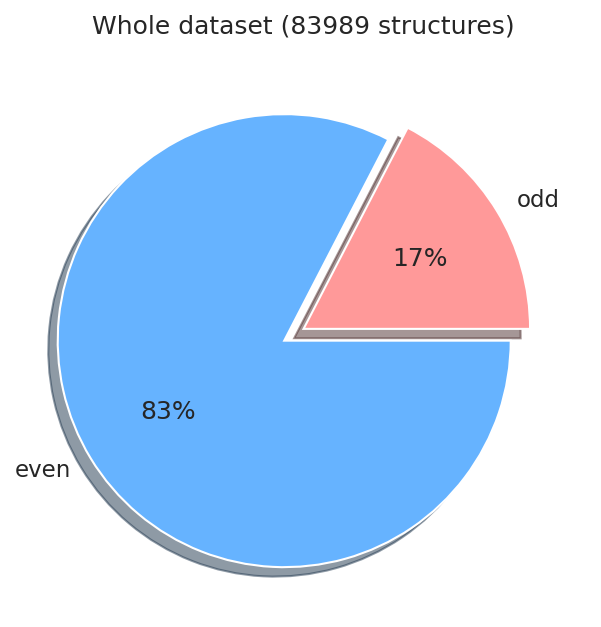

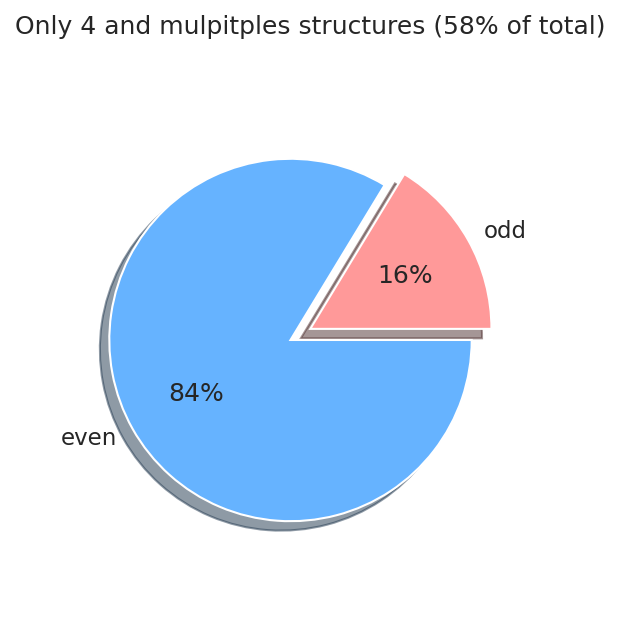

In [33]:
# #pie chart for metals 
percentage_str_4=int(number_structures_with_multiple_of_4*100/len(frames_init_tot))
explode = (0, 0.1) 
labels=['odd', 'even']
colors = ['#ff9999','#66b3ff']
general=[general_metal, general_even]
local=[metal, even]
plt.title('Whole dataset ('+str(len(frames_init_tot))+' structures)')
plt.pie(general, shadow=True, explode=explode,colors=colors, labels=labels, autopct='%1.0f%%')
# plt.savefig("pie_metal?_general.png", bbox_inches='tight', dpi=400)
plt.show()
plt.close()
plt.title('Only 4 and mulpitples structures ('+str(percentage_str_4)+'% of total)')
plt.pie(local, shadow=True, explode=explode,colors=colors,labels=labels, radius=0.8,  autopct='%1.0f%%')
# plt.savefig("pie_metal?.png", bbox_inches='tight', dpi=400)
plt.show()

In [55]:
df_red['magic']=yes_or_no
df_red['natoms']=natoms_list_tot
df_red['e_form_struc']=df_red['e_form']*df_red['natoms']
df_red.head(10)

e_hull  gap pbe          mu_b  elastic anisotropy  bulk modulus  \
0  0.003319   0.0000  2.700000e-05            1.044699     33.154748   
1  0.039182   0.0000 -1.360000e-05          -11.326659     35.636106   
2  0.108143   0.0000  1.000000e-07            8.030000    124.000000   
3  0.071216   0.0000 -2.050000e-05            0.881277    101.242732   
4  3.509988   2.0113  3.000042e+00           10.884643      0.327165   
5  0.005612   6.1701  0.000000e+00                 NaN           NaN   
6  0.020462   0.0000 -2.800000e-06                 NaN           NaN   
7  0.615956   0.0000 -1.807400e-03          -60.573886     21.044759   
8  0.008637   0.0000 -1.827100e-03            8.702322     11.543947   
9  0.000000   6.1671  1.040000e-05                 NaN           NaN   

   shear modulus    e_form  magic  natoms  e_form_struc  
0       4.904836  0.003319      0       1      0.003319  
1       1.830272  0.039182      0       1      0.039182  
2      84.000000  0.108143      1       4      0.432571  
3      44.836516  0.071216      0       1      0.071216  
4      -0.064038  3.509988      0       1      3.509988  
5            NaN  0.005612      0       1      0.005612  
6            NaN  0.020462      0       1      0.020462  
7     -18.850184  0.615956      0       1      0.615956  
8       6.232662  0.008637      0       1      0.008637  
9            NaN  0.000000      0       1      0.000000

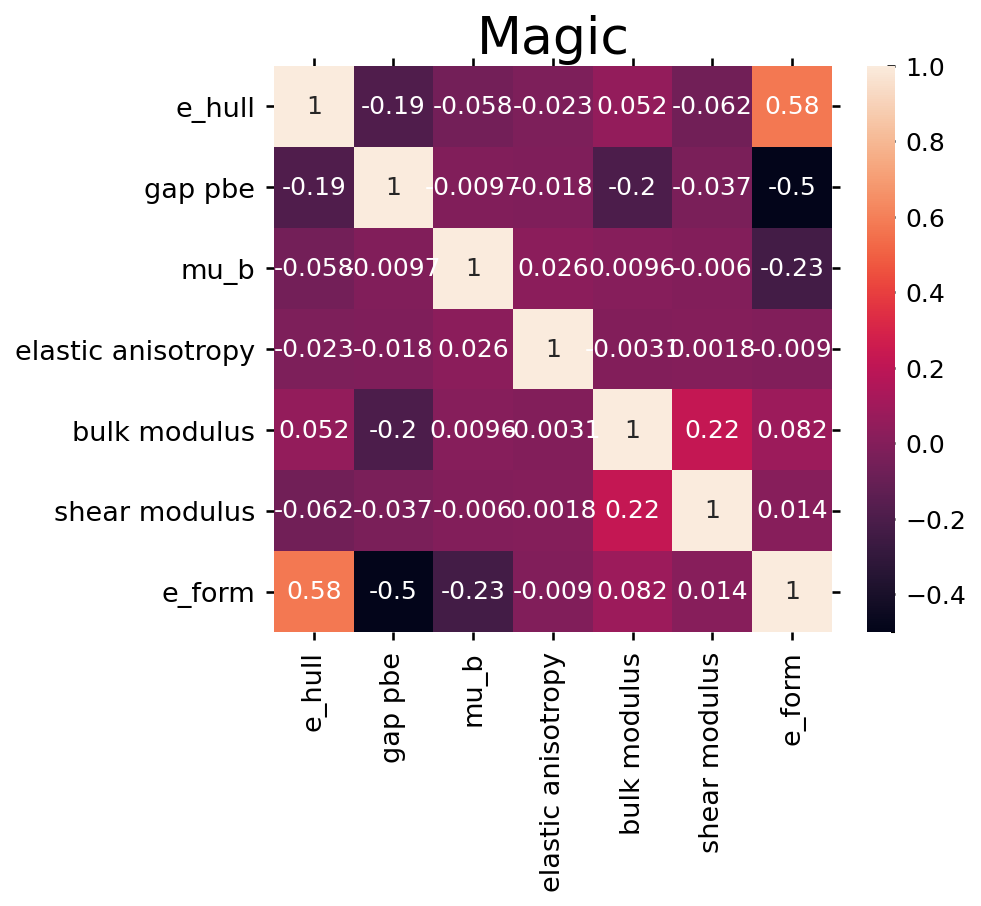

Text(0.5, 1.0, 'Non magic')

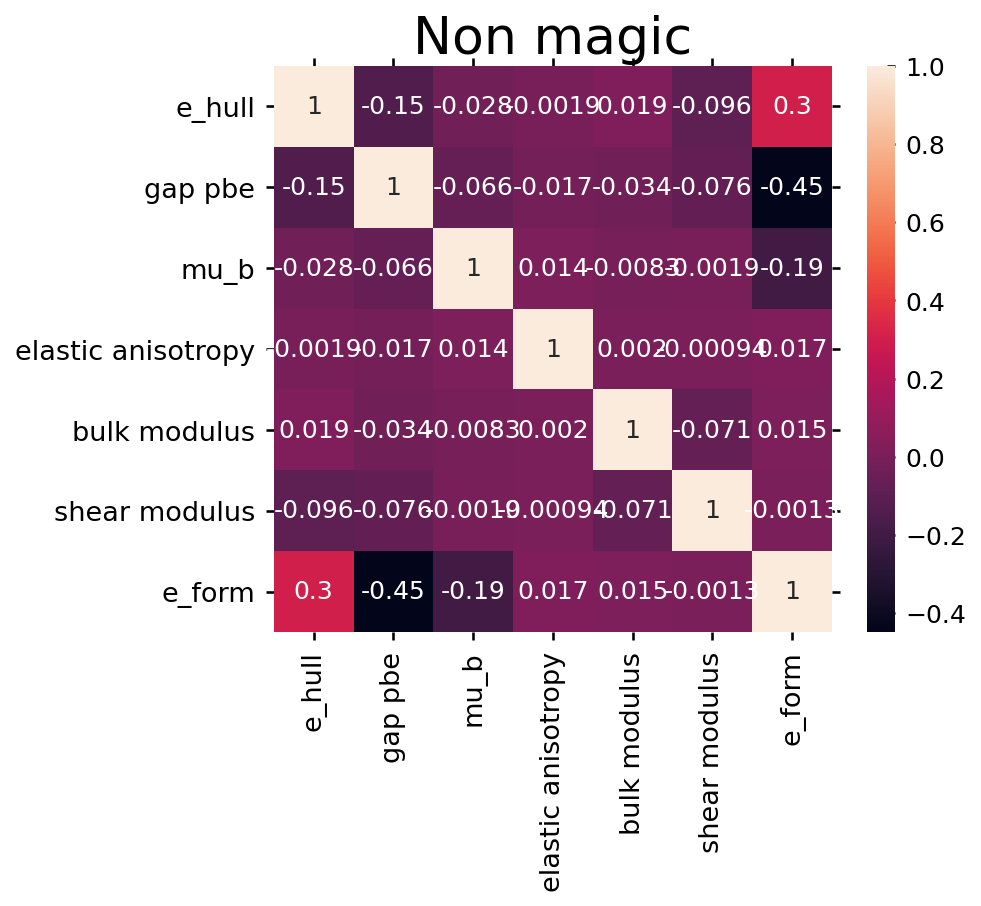

In [18]:
# formE_struc=[]

# for i in range(len(formE_tot)):
#     formE_struc.append(formE_tot[i]*natoms_list_tot[i])
                      
# dict={'natom': natoms_list_tot, 'formE_struc': formE_struc,'formE_atomic':formE_tot, 
#       'Ehull':hull_tot,  'Egap':gap_tot, 'magic':yes_or_no} 

# df= pd.DataFrame(dict)
# %store df

m=df_red.loc[df_red['magic'] == 1]

m=m.drop(['natoms', 'magic'], axis=1)

nm=df_red.loc[df_red['magic'] == 0]
nm=nm.drop(['natoms', 'magic'], axis=1)

corrm=m.corr()
corrnm=nm.corr()

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corrm, annot=True)
ax.tick_params(labelsize=13, direction='out')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.title('Magic', size=25)
plt.show()


fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corrnm, annot=True)
ax.tick_params(labelsize=13, direction='out')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.title('Non magic', size=25)


<Figure size 900x750 with 0 Axes>

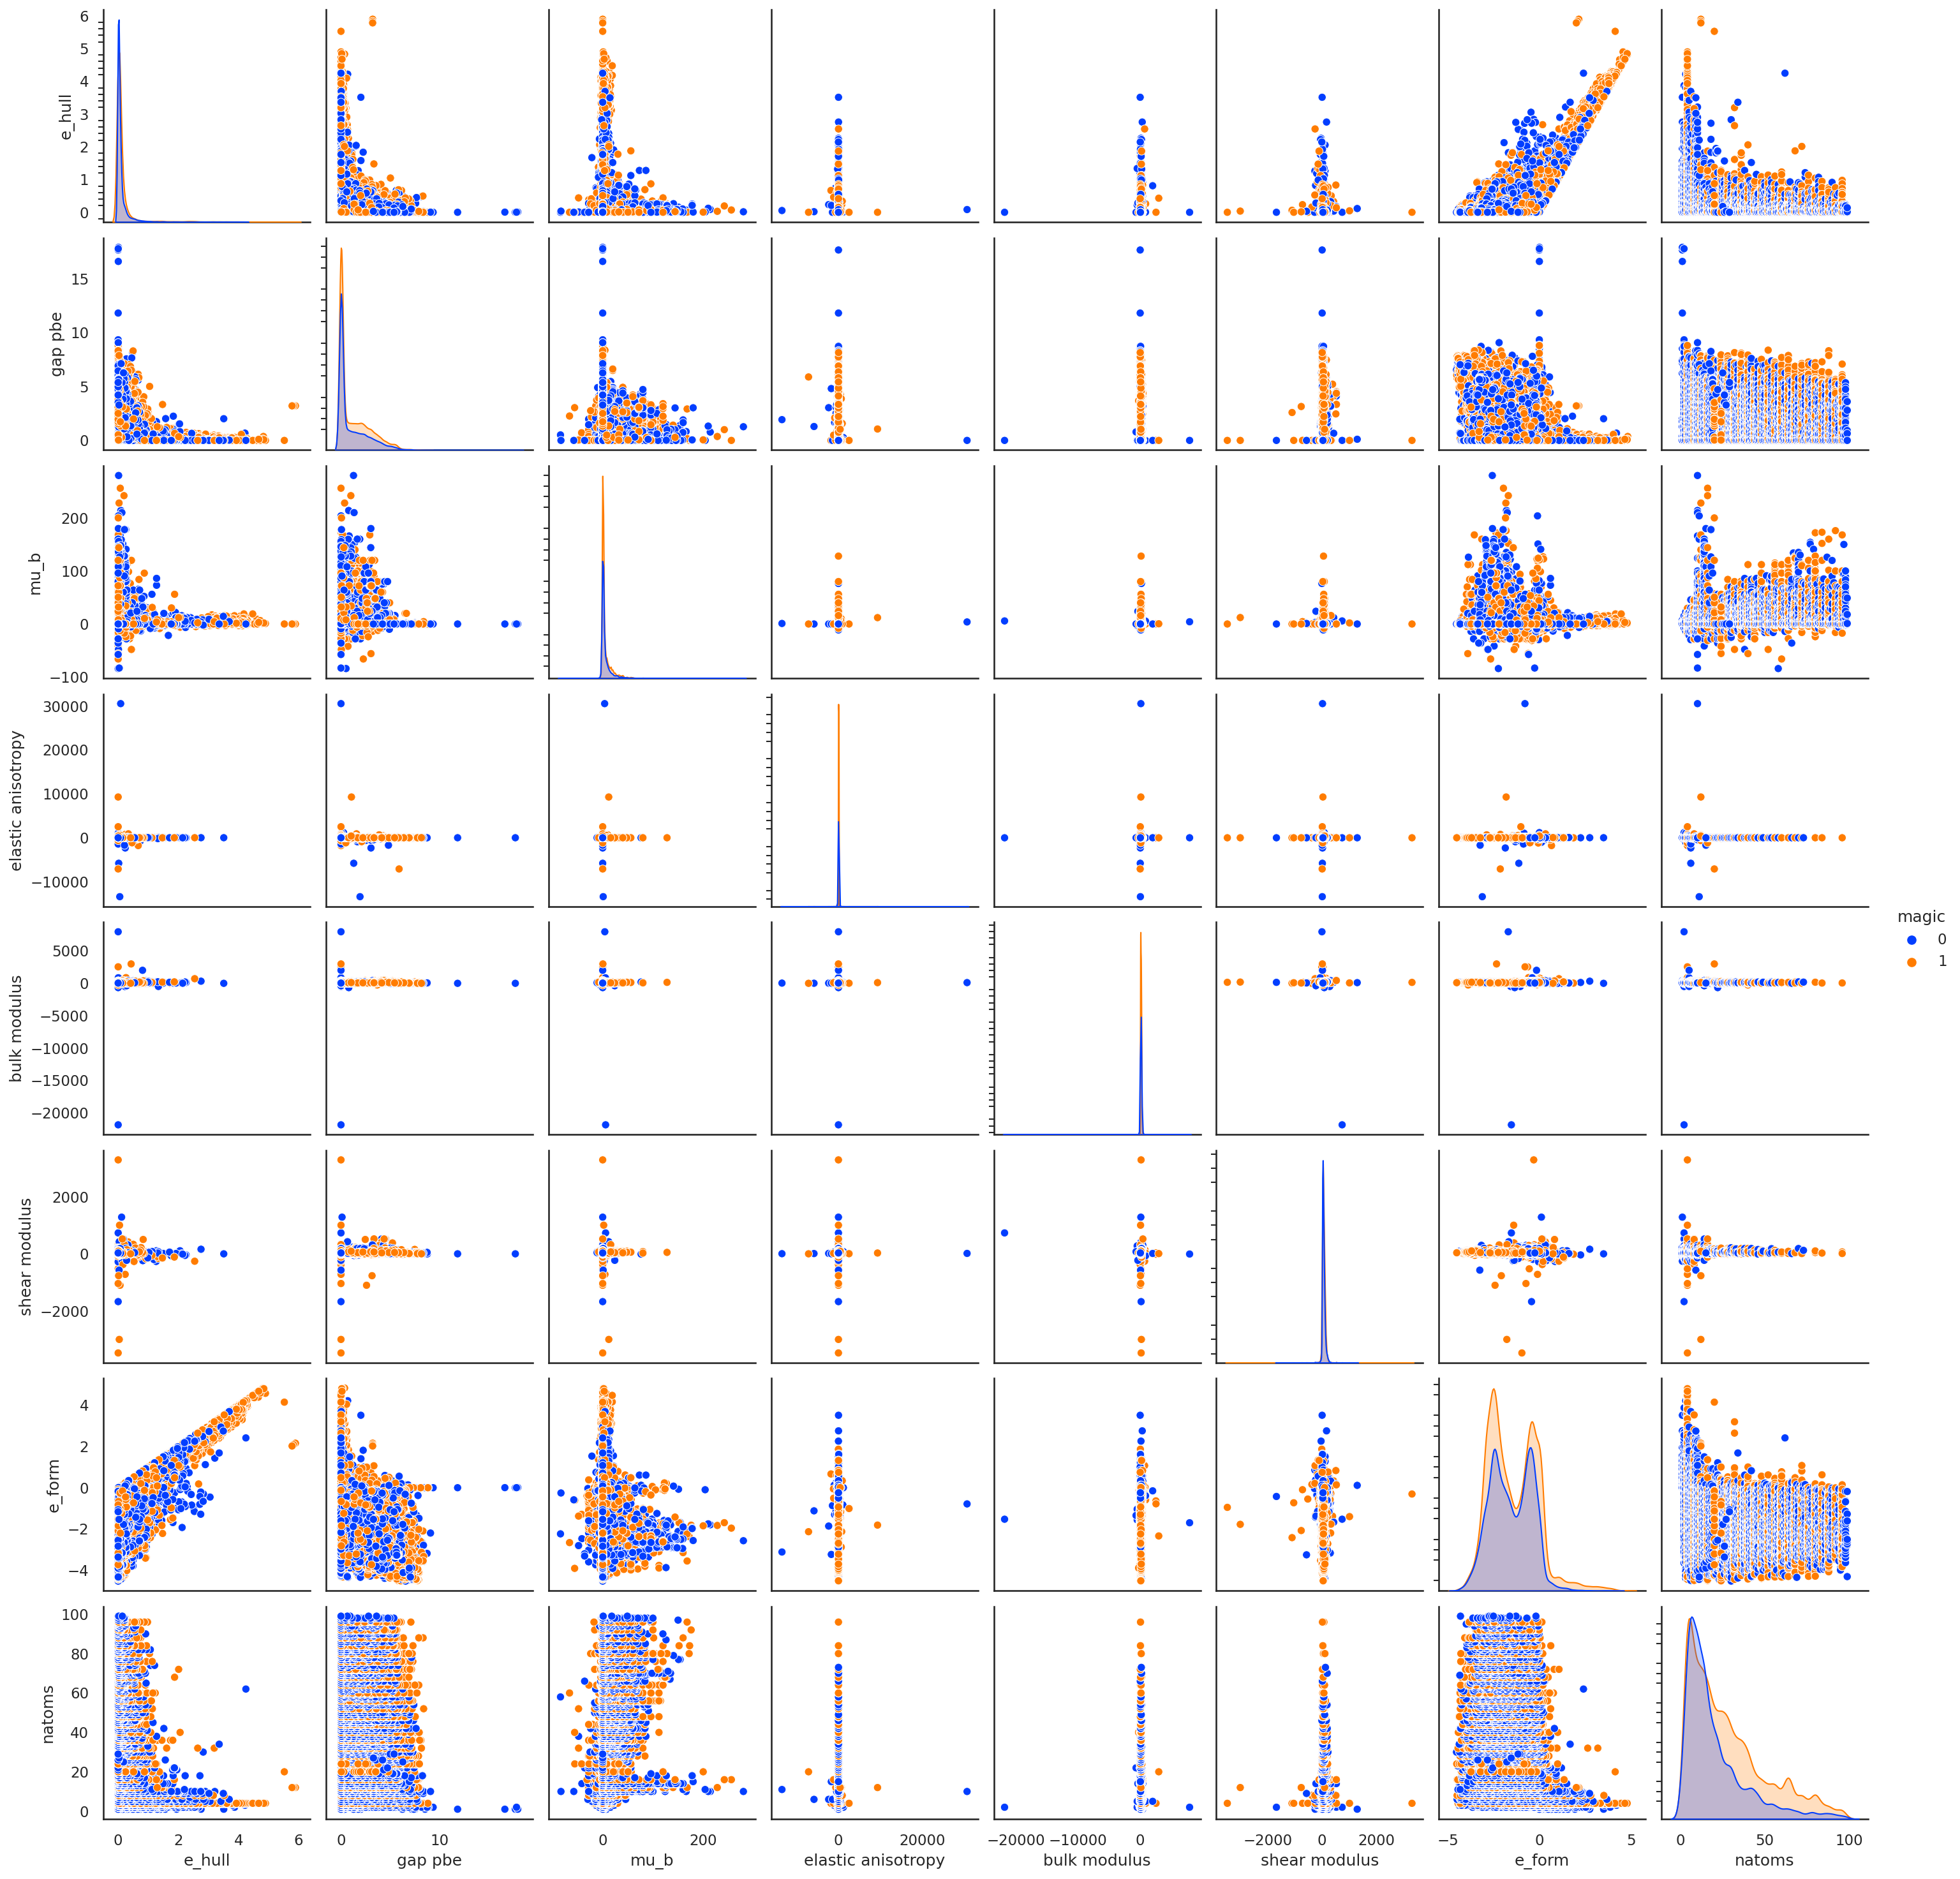

In [27]:
sns.set(style="white", palette="bright", color_codes=True)
sns.despine(left=True, bottom=True)
sns.pairplot(df_red, hue="magic") 

(0.0, 0.035)

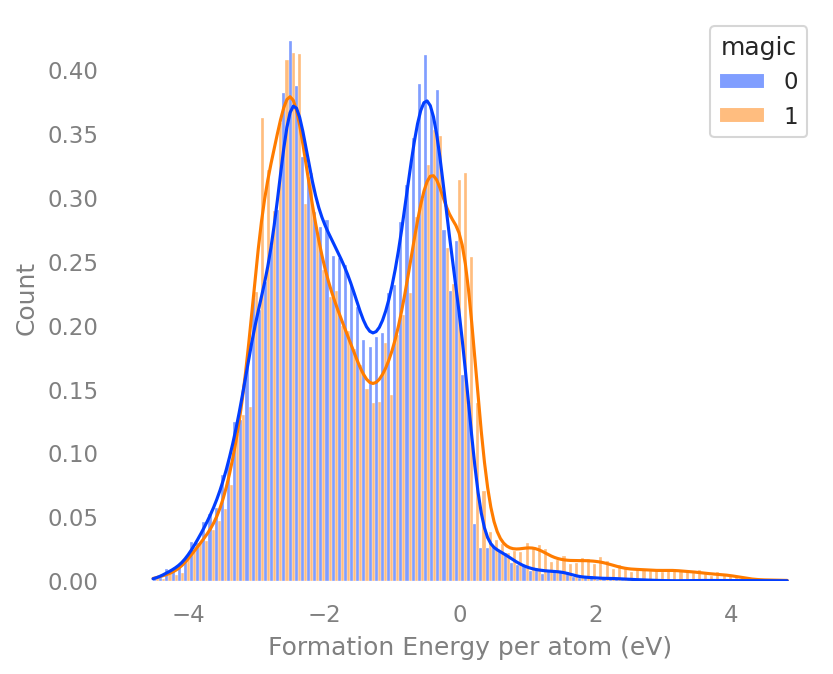

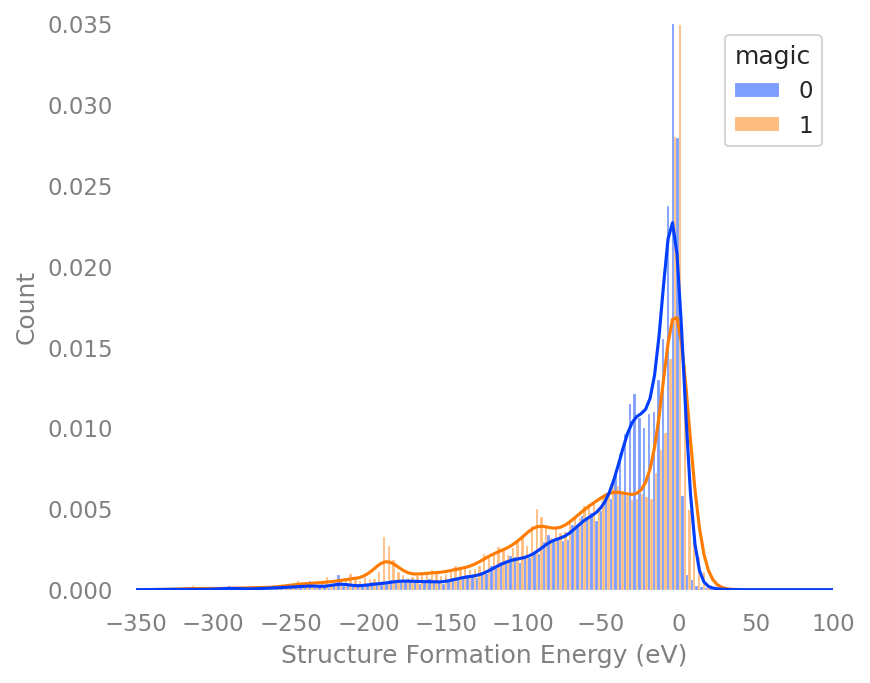

In [42]:
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
sns.histplot(data=df_red, x='e_form', hue='magic', multiple='dodge', common_norm=False, stat='density', kde=True)
plt.xticks(c='grey')
plt.yticks(c='grey')
# plt.title("Materials Project")
plt.ylabel('Count', c='grey')
plt.xlabel('Formation Energy per atom (eV)', c='grey' )
# plt.xlim(-350, 50)

f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
sns.histplot(data=df_red, x='e_form_struc', hue='magic', multiple='dodge', stat='density', common_norm=False, kde=True)
plt.xticks(c='grey')
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')

plt.xlabel('Structure Formation Energy (eV)', c='grey')
plt.xlim(-350,100)
plt.ylim(0, 0.035)

(-1000.0, 1000.0)

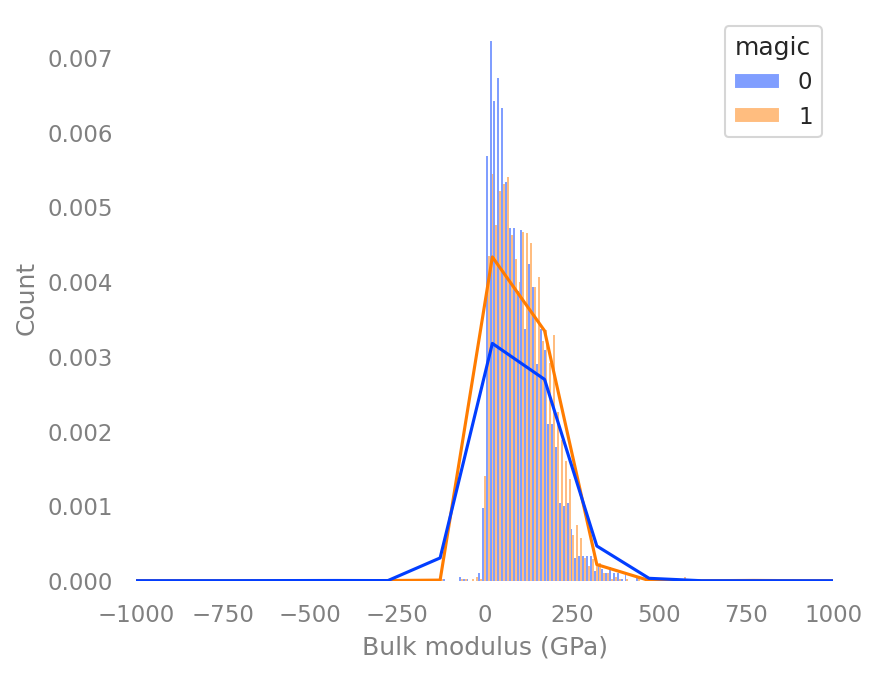

In [62]:
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
sns.histplot(data=df_red, x='bulk modulus', hue='magic', 
             multiple='dodge', stat='density', common_norm=False, kde=True)

# sns.histplot(data=df_red, x='shear modulus', hue='magic', 
#              multiple='dodge', stat='density', common_norm=False, linestyle='--', kde=True)
plt.xticks(c='grey')
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')
plt.xlabel('Bulk modulus (GPa)', c='grey')
plt.xlim(-1000,1000)
# plt.ylim(0, 0.035)

In [ ]:
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
sns.histplot(data=df, x='e_hull', hue='magic', multiple='dodge', common_norm=False, stat='density', kde=True)
plt.xticks(c='grey')
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')

plt.xlabel('E above convex hull (eV/atom)', c='grey', )
plt.ylim(0,8)
plt.xlim(0,1)

In [ ]:
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
sns.histplot(data=df, x='gap_pbe', hue='magic', multiple='dodge', common_norm=False, stat='density', kde=True)
plt.xticks(c='grey')
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')

plt.xlabel('Band gap (eV)', c='grey', )
plt.ylim(0,1.5)
plt.xlim(0,7.5)

In [63]:
natoms_magic=df_red.loc[df_red['magic'] == 1][['bulk modulus']]
natoms_magic.mean()

bulk modulus    113.373488
dtype: float64

In [66]:
natoms_nmagic=df_red.loc[df_red['magic'] != 1][['bulk modulus']]
natoms_nmagic.mean()

bulk modulus    95.648412
dtype: float64

In [54]:
df_red['natoms'].mean()

24.755694198049746

In [2]:
zf = zipfile.ZipFile('./MP_complete.zip') 
df_csv = pd.read_csv(zf.open('MP_complete.csv'))
print(len(df_csv))

natoms_list_tot=[]
magic=[]
for i in range(len(df_csv)):
    natoms_list_tot.append(natoms(df_csv['structure'][i]))
df_csv['natoms']=natoms_list_tot
magic=[]
for i in range(len(df_csv)):
    if natoms_list_tot[i]%4==0:
        m=1
    else:
        m=0
    magic.append(m)
df_csv['magic']=magic             


pos=df_csv.loc[df_csv['e_form']>0]
neg=df_csv.loc[df_csv['e_form']<=0]
print(len(neg), len(pos), len(neg)+len(pos))

83989
75472 8517 83989


In [3]:
p=pos.loc[pos['magic']==1]
n=neg.loc[neg['magic']==1]
len(n), len(p)
print('Within non-physical structures, '+str(len(p)*100/len(pos))+' % are magic')
print('Within physical structures, '+str(len(n)*100/len(neg))+' % are magic')

Within non-physical structures, 75.78959727603616 % are magic
Within physical structures, 56.32817468730125 % are magic
